In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
rcParams['agg.path.chunksize'] = 10000

In [2]:
data = pd.read_csv('linkedin.csv',encoding ="ISO-8859-1")

In [3]:
data.head(5)

,JobTitle,Location,Industry,Employment Type,seniorityLevel,JobFunction,CompanyName,JobPostedon
0,Drilling Engineer Well Construction,Denver; CO; US,Oil & Energy,Full-time,Not Applicable,Engineering,Anadarko Petroleum Corporation,26-08-17
1,ESS Analyst Analytics & Data Integrity,The Woodlands; TX; US,Oil & Energy,Full-time,Not Applicable,Finance,Anadarko Petroleum Corporation,25-08-17
2,Sr ESS Analyst Analytics & Data Integrity,The Woodlands; TX; US,Oil & Energy,Full-time,Not Applicable,Finance,Anadarko Petroleum Corporation,25-08-17
3,Sr ITS Developer _ÑÐ Data Engineering,Denver; CO; US,Oil & Energy,Full-time,Not Applicable,Information Technology,Anadarko Petroleum Corporation,18-08-17
4,Counsel / Sr Counsel _ÑÐ Project Finance,The Woodlands; TX; US,Oil & Energy,Full-time,Not Applicable,Legal,Anadarko Petroleum Corporation,11/8/17


In [4]:
data['Posted'] = pd.to_datetime(data['JobPostedon'])

In [5]:
data['Month'] = data['Posted'].dt.strftime('%b')

In [6]:
data.columns

Index(['JobTitle', 'Location', 'Industry', 'Employment Type', 'seniorityLevel',
       'JobFunction', 'CompanyName', 'JobPostedon', 'Posted', 'Month'],
      dtype='object')

In [7]:
data.pivot_table(index = ['CompanyName','Location','Employment Type','seniorityLevel','JobFunction','Month'],values=['JobTitle'],aggfunc=np.count_nonzero)

JobTitle
CompanyName         Location              Employment Type seniorityLevel   JobFunction                                Month          
Aera Energy LLC     Bakersfield; CA; US   Full-time       Associate        Legal                                      Jul           1
                    Bangalore; IN         Full-time       Mid-Senior level Product Management. Marketing              Aug           1
Amec Foster Wheeler Aberdeen; GB          Contract        Associate        Other                                      Aug           1
                                                          Director         Accounting/Auditing. Finance               Aug           1
                                          Full-time       Associate        Engineering. Information Technology        Aug           3
                                                                                                                      Jul           1
                                                                           Information Technology                     Jun           1
                                                                           Management. Manufacturing                  Aug           1
                                                                           Other                                      Jun           1
                                                                           Project Management. Information Technology Jun           1
                                                                           Purchasing. Supply Chain                   Aug           1
                                                                           Research. Analyst. Information Technology  Aug           1
                                                                           Sales. Management                          Aug           2
                                                                                                                      Jul           2
                                                          Entry level      Administrative                             Aug           1
                                                                           Engineering. Information Technology        Aug           3
                                                                                                                      May           1
                                                                           Human Resources                            Aug           1
                                                                           Management. Manufacturing                  Aug           5
                                                                                                                      Jun           1
                                                          Mid-Senior level Management. Manufacturing                  Aug           1
                                                                           Project Management. Information Technology Jul           1
                                                                           Sales. Business Development                Aug           2
                                          Part-time       Associate        Engineering. Information Technology        Aug           1
                    Aberdeenshire; GB     Contract        Associate        Other                                      Aug           1
                    Accra; GH             Full-time       Associate        Administrative                             Aug           1
                                                                           Human Resources                            Jul           1
                                                                           Management. Manufacturing                  Aug           2
                                                                                                         

In [8]:
data.pivot_table(index = ['CompanyName','Location','Month'],values=['JobTitle'],aggfunc=np.count_nonzero)

JobTitle
CompanyName         Location                 Month          
Aera Energy LLC     Bakersfield; CA; US      Jul           1
                    Bangalore; IN            Aug           1
Amec Foster Wheeler Aberdeen; GB             Aug          24
                                             Jul           4
                                             Jun           4
                                             May           1
                    Aberdeenshire; GB        Aug           1
                    Accra; GH                Aug           3
                                             Jul           2
                                             Jun           1
                    AixenProvence; FR        Aug           2
                    Atlanta; GA; US          Aug           1
                                             Jul           3
                                             Jun           2
                    Barnwood; GB             Aug           2
                                             Jul           7
                    Basel; CH                Jul           2
                    Blair; NE; US            Jun           2
                    Blue Bell; PA; US        Aug           1
                    Bothell; WA; US          Jul           1
                    Bowmanville; CA          Jun           1
                    Box Elder County; UT; US Jul           1
                    Boydton; VA; US          Jun           4
                    Bridgwater; GB           Jun           1
                    Bristol; GB              Jul           1
                    Burlington; CA           Aug           3
                                             Jul           3
                    Bury St Edmunds; GB      Jul           1
                    Calgary; CA              Aug           1
                                             Jul           1
...                                                      ...
Xcel Energy         Hayden; CO; US           Jul           1
                    Henderson; CO; US        Sep           1
                    La Crosse; WI; US        Aug           1
                    Lubbock; TX; US          Aug           1
                    Maple Grove; MN; US      Aug           2
                                             Sep           1
                    Minneapolis; MN; US      Aug          14
                                             Jul           1
                                             Sep           3
                    Pampa; TX; US            Jul           1
                    Plainview; TX; US        Jul           1
                    Red Wing; MN; US         Aug           2
                    Rifle; CO; US            Jul           1
                    Saint Paul; MN; US       Aug           1
                                             Jul           1
                    Silverthorne; CO; US     Jul           2
                    Sterling; CO; US         Aug           1
                                             Jul           1
                    Welch; MN; US            Aug           2
phillips66          Bartlesville; OK; US     Aug           6
                    Belle Chasse; LA; US     Aug           7
                    Borger; TX; US           Aug           2
                    Houston; TX; US          Aug          28
                    London; GB               Aug           4
                    Odessa; TX; US           Aug           1
                    Rodeo; CA; US            Aug           3
                    Santa Maria; CA; US      Aug           2
                    Selmer; TN; US           Aug           1
                    Tracy; CA; US            Aug           1
                    Wichita Falls; TX; US    Aug           1

[2733 rows x 1 columns]

In [9]:
data.pivot_table(index = ['CompanyName','Location','JobFunction'],values=['JobTitle'],aggfunc=np.count_nonzero).reset_index()

,CompanyName,Location,JobFunction,JobTitle
0,Aera Energy LLC,Bakersfield; CA; US,Legal,1
1,Aera Energy LLC,Bangalore; IN,Product Management. Marketing,1
2,Amec Foster Wheeler,Aberdeen; GB,Accounting/Auditing. Finance,1
3,Amec Foster Wheeler,Aberdeen; GB,Administrative,1
4,Amec Foster Wheeler,Aberdeen; GB,Engineering. Information Technology,9
5,Amec Foster Wheeler,Aberdeen; GB,Human Resources,1
6,Amec Foster Wheeler,Aberdeen; GB,Information Technology,1
7,Amec Foster Wheeler,Aberdeen; GB,Management. Manufacturing,8
8,Amec Foster Wheeler,Aberdeen; GB,Other,2
9,Amec Foster Wheeler,Aberdeen; GB,Project Management. Information Technology,2


In [10]:
grouped_df = data.groupby(['CompanyName','Location','Employment Type','seniorityLevel','JobFunction','Month','JobTitle']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)

In [11]:
grouped_df.head(10)

,CompanyName,Location,Employment Type,seniorityLevel,JobFunction,Month,JobTitle,counts
631,Baker Hughes a GE company,Odessa; TX; US,Full-time,Entry level,Engineering. Information Technology,Aug,Fishing & Thru Tubing Tools Specialist Complet...,6
6649,Total,Pau; FR,Full-time,Not Applicable,Other,Aug,Applications et Progiciels,5
7070,Weatherford,Pearland; TX; US,Full-time,Entry level,Engineering. Information Technology,Aug,Field Service Rep/Offshore RCD,5
7071,Weatherford,Pearland; TX; US,Full-time,Entry level,Engineering. Information Technology,Aug,Field Service Representative Control Systems T...,5
7072,Weatherford,Pearland; TX; US,Full-time,Entry level,Engineering. Information Technology,Aug,MPD Control System Field Engineer,5
6959,Weatherford,Kuwait City; KW,Full-time,Entry level,Management. Manufacturing,Aug,FIELD OPERATOR,5
6654,Total,Pau; FR,Full-time,Not Applicable,Other,Aug,ResponsabilitÕ©s gÕ©nÕ©rales / Pilotage SI,5
4047,"Kinder Morgan, Inc.",Pasadena; TX; US,Full-time,Entry level,Management. Manufacturing,Aug,Terminal Operator,5
2319,Energy Transfer,Barstow; TX; US,Full-time,Entry level,Management. Manufacturing,Sep,Plant Operator C,4
6656,Total,Pau; FR,Full-time,Not Applicable,Project Management. Information Technology,Aug,Gestion Administrative,4


In [12]:
grouped_df.dtypes

CompanyName        object
Location           object
Employment Type    object
seniorityLevel     object
JobFunction        object
Month              object
JobTitle           object
counts              int64
dtype: object

In [13]:
Monthly_trend_byCompany = data.groupby(['CompanyName','Month']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)

In [14]:
Monthly_trend_byCompany.head(10)

,CompanyName,Month,counts
77,ENGIE,Aug,695
122,Halliburton,Aug,481
237,Shell,Jul,401
142,Intertek,Aug,355
260,Total,Aug,299
114,ExxonMobil,Jul,283
267,Weatherford,Aug,265
218,Saudi Aramco,Jul,208
254,TechnipFMC,Aug,179
19,Baker Hughes a GE company,Aug,157


#### Monthly timeline of Job Postings by Company

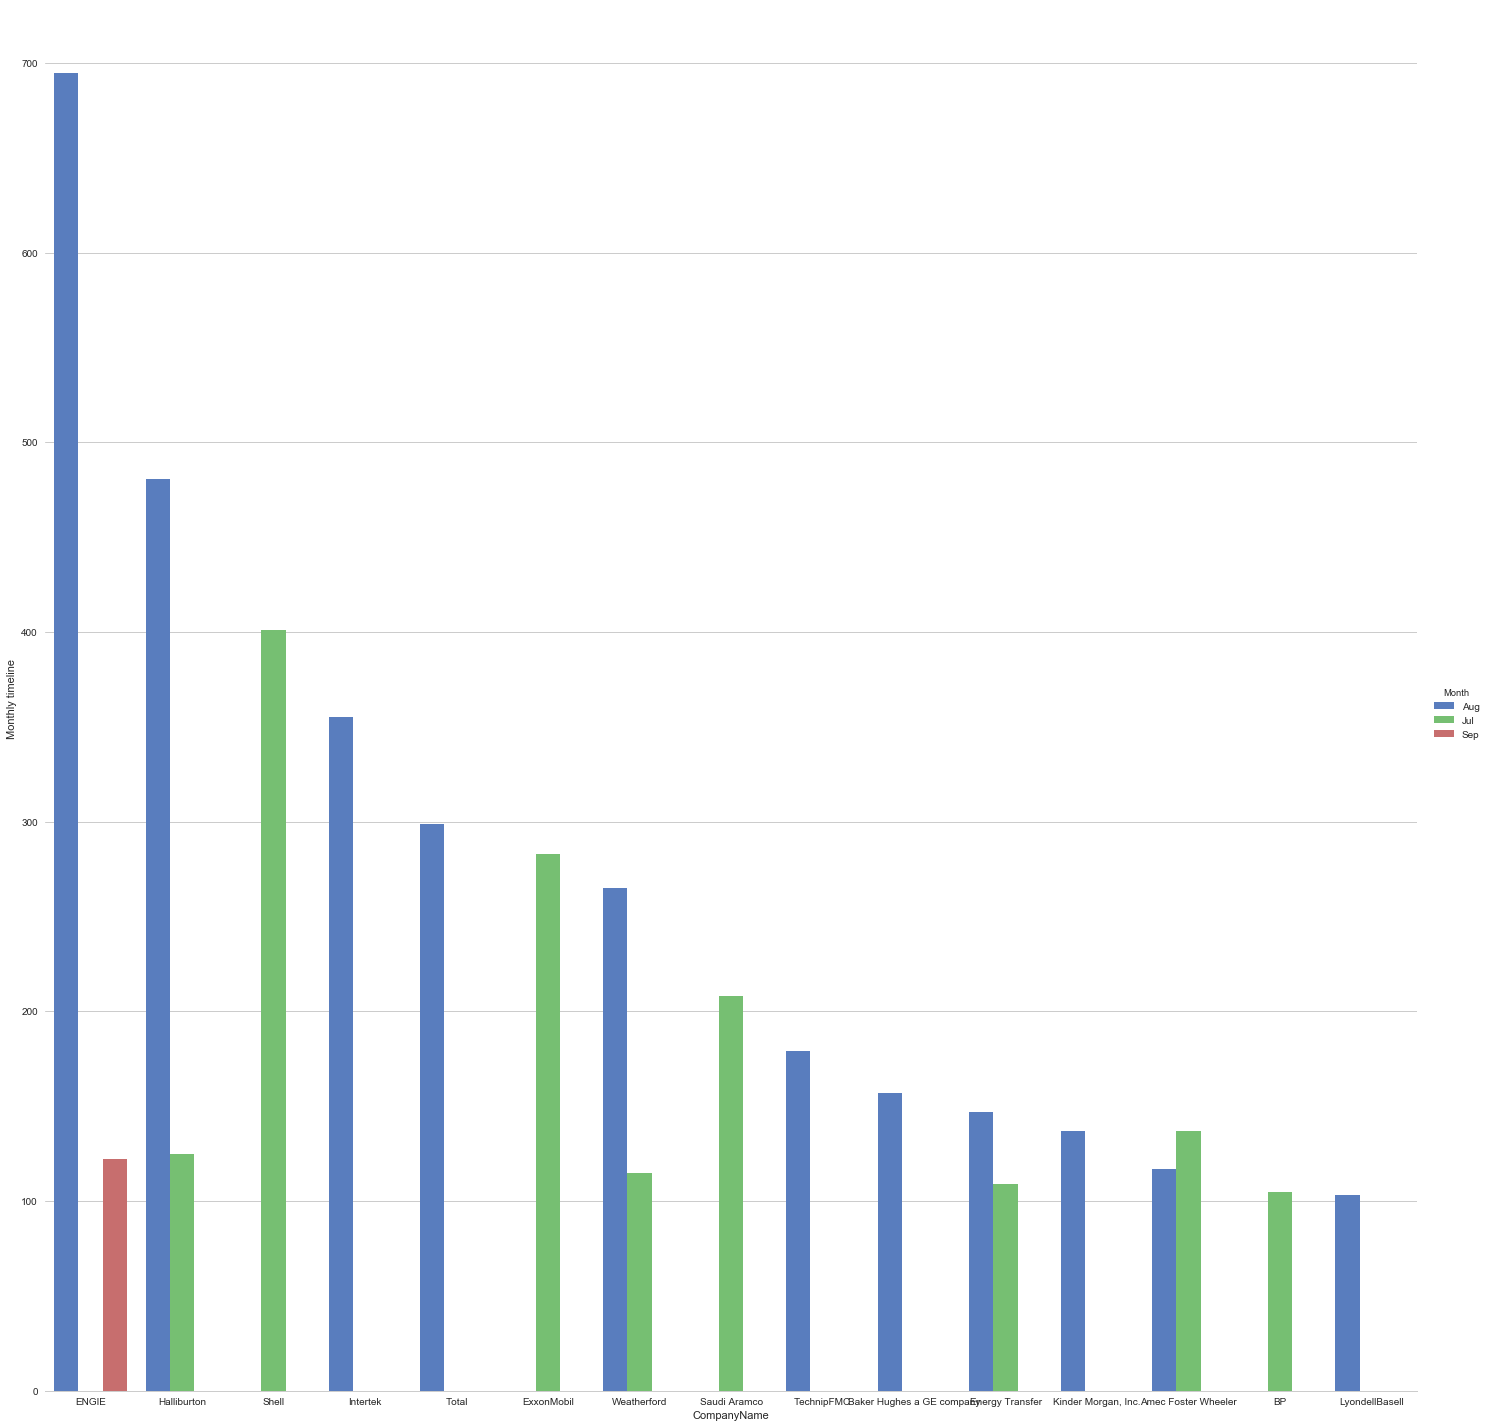

In [15]:
import seaborn as sns
sns.set(style="whitegrid")
g = sns.factorplot(x="CompanyName", y="counts", hue="Month", data=Monthly_trend_byCompany.head(20),
                   size=20, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Monthly timeline")

In [16]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [17]:
job_trends = (grouped_df.groupby(['CompanyName','JobFunction'])['counts']
          .sum().unstack().reset_index().fillna(0)
          .set_index('CompanyName'))

In [18]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

job_trends = job_trends.applymap(encode_units)

In [19]:
job_trends

JobFunction,Accounting/Auditing,"Accounting/Auditing,Analyst,Finance","Accounting/Auditing,Finance",Accounting/Auditing. Administrative,Accounting/Auditing. Analyst,Accounting/Auditing. Finance,Accounting/Auditing. Finance. Administrative,Accounting/Auditing. Finance. Analyst,Accounting/Auditing. Finance. Management,Accounting/Auditing. Finance. Purchasing,...,Sales. Strategy/Planning. Customer Service,Science,Science. Other,Strategy/Planning,"Strategy/Planning,Engineering","Strategy/Planning,Supply Chain",Supply Chain,Supply Chain. Engineering. Accounting/Auditing,Training,Writing/Editing. Information Technology. Training
CompanyName,,,,,,,,,,,,,,,,,,,,,
Aera Energy LLC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amec Foster Wheeler,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anadarko Petroleum Corporation,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Atlas Oil Company,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BP,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
Baker Hughes a GE company,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Basell,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Berry Petroleum Company,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bill Barrett Corporation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
freqjobs = apriori(job_trends, min_support=0.4, use_colnames=True)

In [25]:
freqjobs

,support,itemsets
0,0.4625,[Accounting/Auditing. Finance]
1,0.4375,[Business Development. Sales]
2,0.5875,[Engineering. Information Technology]
3,0.4375,[Human Resources]
4,0.6875,[Information Technology]
5,0.6750,[Management. Manufacturing]
6,0.7125,[Other]
7,0.4125,[Sales. Business Development]
8,0.4125,"[Accounting/Auditing. Finance, Engineering. In..."
9,0.4250,"[Accounting/Auditing. Finance, Information Tec..."


In [26]:
rules = association_rules(freqjobs, metric="lift", min_threshold=1)
rules

,antecedants,consequents,support,confidence,lift
0,(Accounting/Auditing. Finance),(Engineering. Information Technology),0.4625,0.891892,1.518114
1,(Engineering. Information Technology),(Accounting/Auditing. Finance),0.5875,0.702128,1.518114
2,(Accounting/Auditing. Finance),(Information Technology),0.4625,0.918919,1.336609
3,(Information Technology),(Accounting/Auditing. Finance),0.6875,0.618182,1.336609
4,(Management. Manufacturing),(Accounting/Auditing. Finance),0.6750,0.648148,1.401401
5,(Accounting/Auditing. Finance),(Management. Manufacturing),0.4625,0.945946,1.401401
6,(Other),(Accounting/Auditing. Finance),0.7125,0.578947,1.251778
7,(Accounting/Auditing. Finance),(Other),0.4625,0.891892,1.251778
8,(Business Development. Sales),(Engineering. Information Technology),0.4375,0.942857,1.604863
9,(Engineering. Information Technology),(Business Development. Sales),0.5875,0.702128,1.604863


In [29]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

,antecedants,consequents,support,confidence,lift
0,(Accounting/Auditing. Finance),(Engineering. Information Technology),0.4625,0.891892,1.518114
1,(Engineering. Information Technology),(Accounting/Auditing. Finance),0.5875,0.702128,1.518114
2,(Accounting/Auditing. Finance),(Information Technology),0.4625,0.918919,1.336609
3,(Information Technology),(Accounting/Auditing. Finance),0.6875,0.618182,1.336609
4,(Management. Manufacturing),(Accounting/Auditing. Finance),0.6750,0.648148,1.401401
5,(Accounting/Auditing. Finance),(Management. Manufacturing),0.4625,0.945946,1.401401
6,(Other),(Accounting/Auditing. Finance),0.7125,0.578947,1.251778
7,(Accounting/Auditing. Finance),(Other),0.4625,0.891892,1.251778
8,(Business Development. Sales),(Engineering. Information Technology),0.4375,0.942857,1.604863
9,(Engineering. Information Technology),(Business Development. Sales),0.5875,0.702128,1.604863
